In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
file = Path.cwd()
file = file.parent
file = str(file) + "/data_cleanup/train_data_cleaned.csv"
print(file)

/home/matijak/Documents/programiranje/lumen/data_cleanup/train_data_cleaned.csv


In [3]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night
0,0,73710,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0,2.0,2127.731
1,2,74464,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0,1.0,4336.857
2,3,74461,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0,1.0,8536.766
3,4,74466,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,...,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0,2.0,NaN
4,6,74470,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,1012.948,10392.280,1592.714,159.286,262.800,0.000,4,3.0,1.0,8536.766


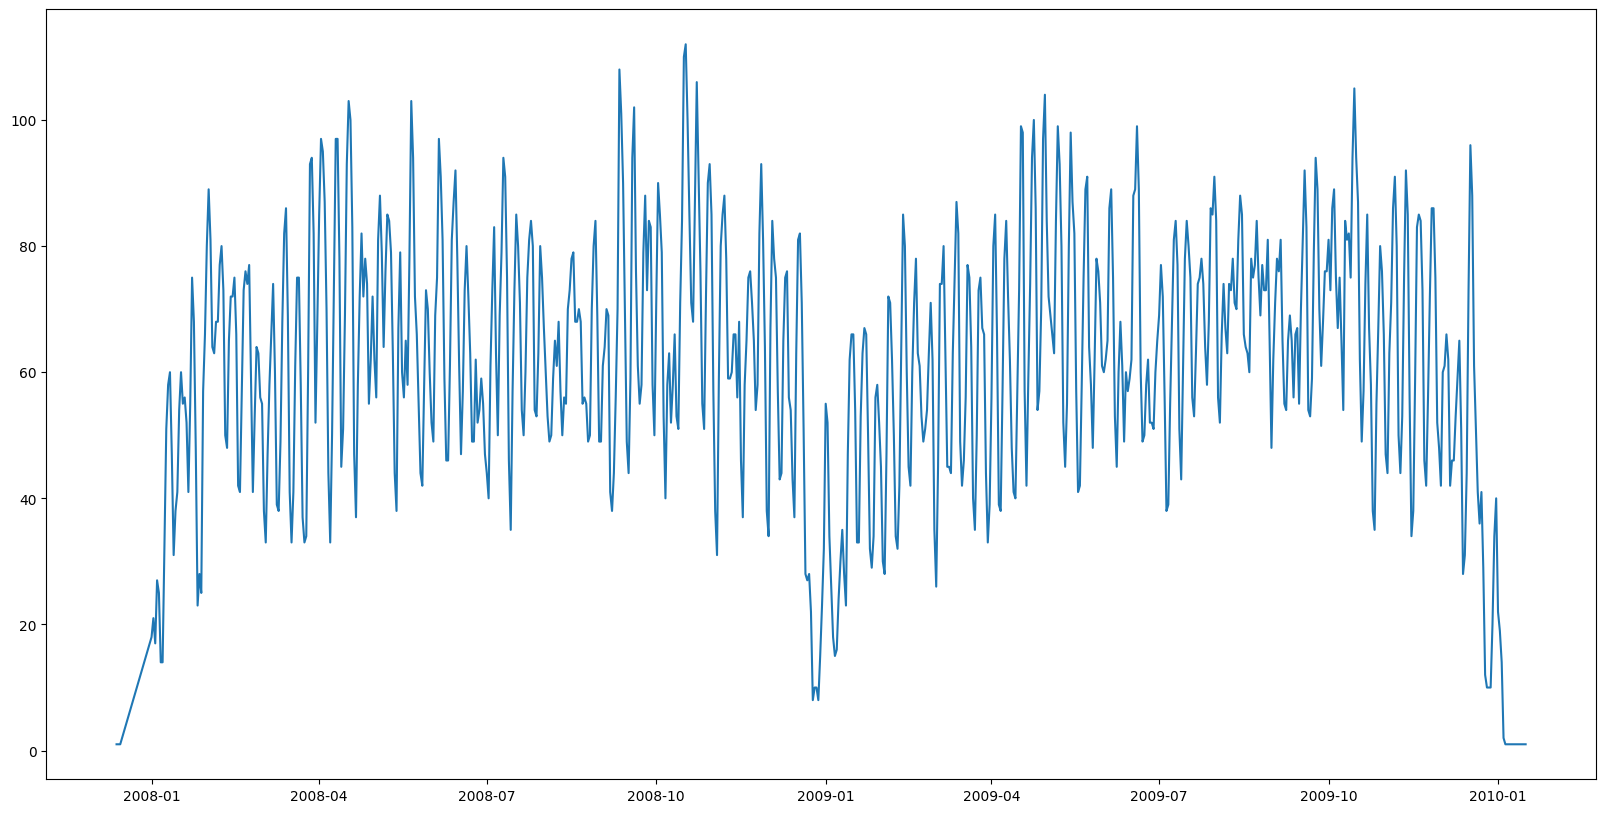

In [6]:
df['date_from'] = pd.to_datetime(df['date_from'])
df['date_to'] = pd.to_datetime(df['date_to'])
def expand_date_range(row):
    return pd.date_range(start=row['date_from'], end=row['date_to'], freq='D')
# Apply the function to expand the date range
expanded_dates = df.apply(expand_date_range, axis=1).explode()

# Count the occurrences of each date
reservations_per_date = expanded_dates.value_counts().reset_index()

# Rename columns
reservations_per_date.columns = ['date', 'number_of_reservations']
plt.figure(figsize = (20,10))
reservations_per_date.index = reservations_per_date['date']
reservations_per_date = reservations_per_date.sort_index()
#reservations_per_date.drop('date', axis=1, inplace=True)
plt.plot(reservations_per_date.index,reservations_per_date["number_of_reservations"])

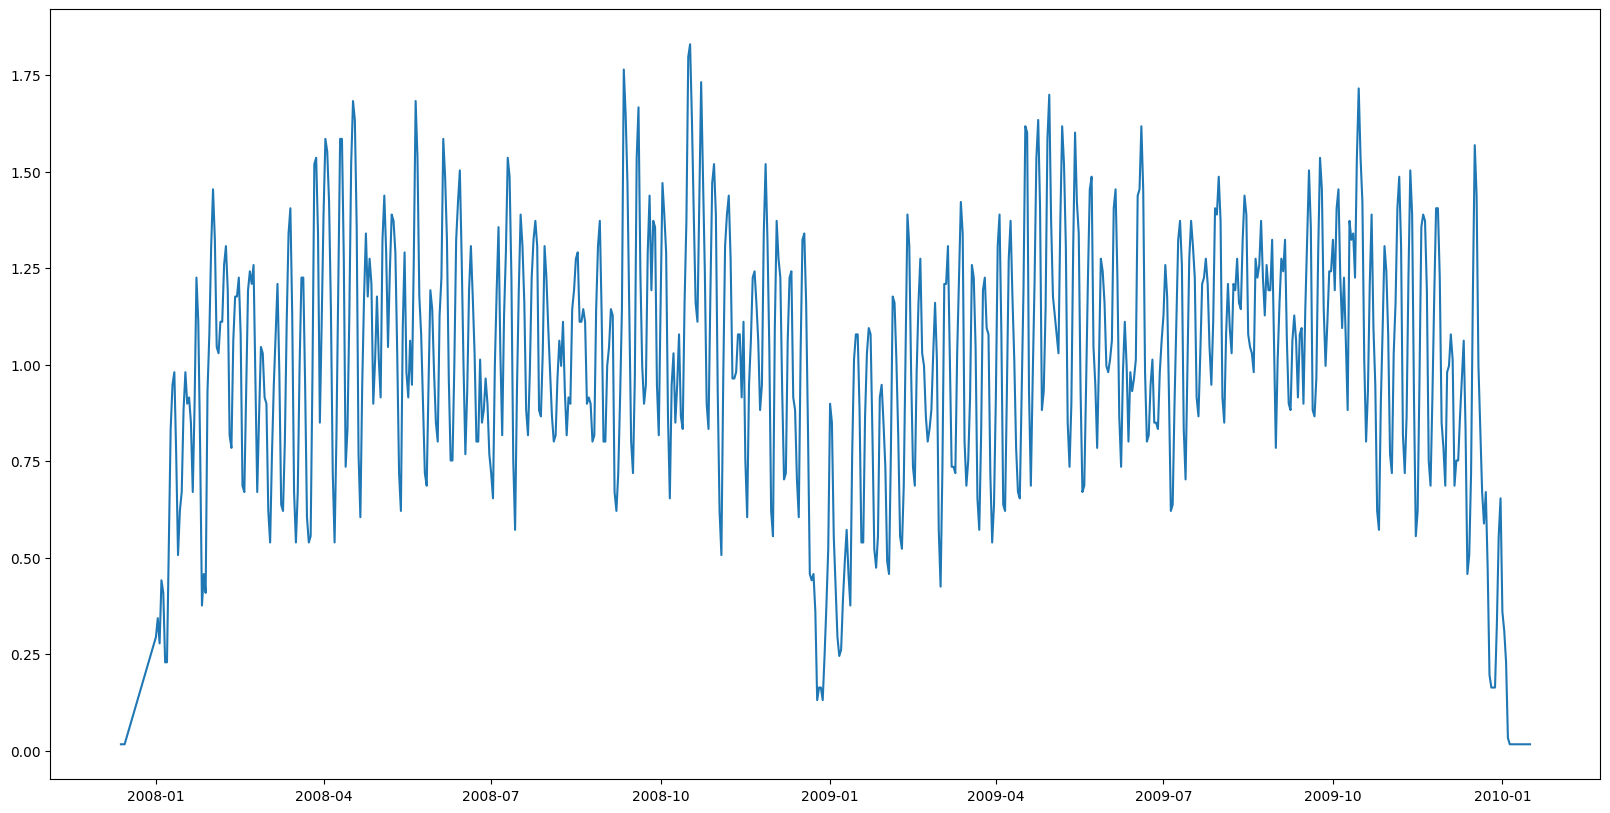

In [8]:
me = reservations_per_date['number_of_reservations'].mean()
reservations_per_date["avg_dev"] = reservations_per_date["number_of_reservations"]/me
plt.figure(figsize = (20,10))
plt.plot(reservations_per_date.index,reservations_per_date["avg_dev"])

In [38]:
df2 = reservations_per_date["number_of_reservations"]
df2.head(n = 20)

date
2007-12-13     1
2007-12-14     1
2007-12-15     1
2008-01-01    18
2008-01-02    21
2008-01-03    17
2008-01-04    27
2008-01-05    25
2008-01-06    14
2008-01-07    14
2008-01-08    32
2008-01-09    51
2008-01-10    58
2008-01-11    60
2008-01-12    47
2008-01-13    31
2008-01-14    38
2008-01-15    41
2008-01-16    54
2008-01-17    60
Name: number_of_reservations, dtype: int64

2007-12-01       3
2008-01-01    1337
2008-02-01    1887
2008-03-01    1799
2008-04-01    2159
2008-05-01    2099
2008-06-01    1944
2008-07-01    2078
2008-08-01    1941
2008-09-01    2044
2008-10-01    2326
2008-11-01    1913
2008-12-01    1447
2009-01-01    1322
2009-02-01    1579
2009-03-01    1769
2009-04-01    2067
2009-05-01    2180
2009-06-01    1935
2009-07-01    2113
2009-08-01    2210
2009-09-01    2090
2009-10-01    2236
2009-11-01    1956
2009-12-01    1408
2010-01-01      69
Name: number_of_reservations, dtype: int64
1765.8076923076924


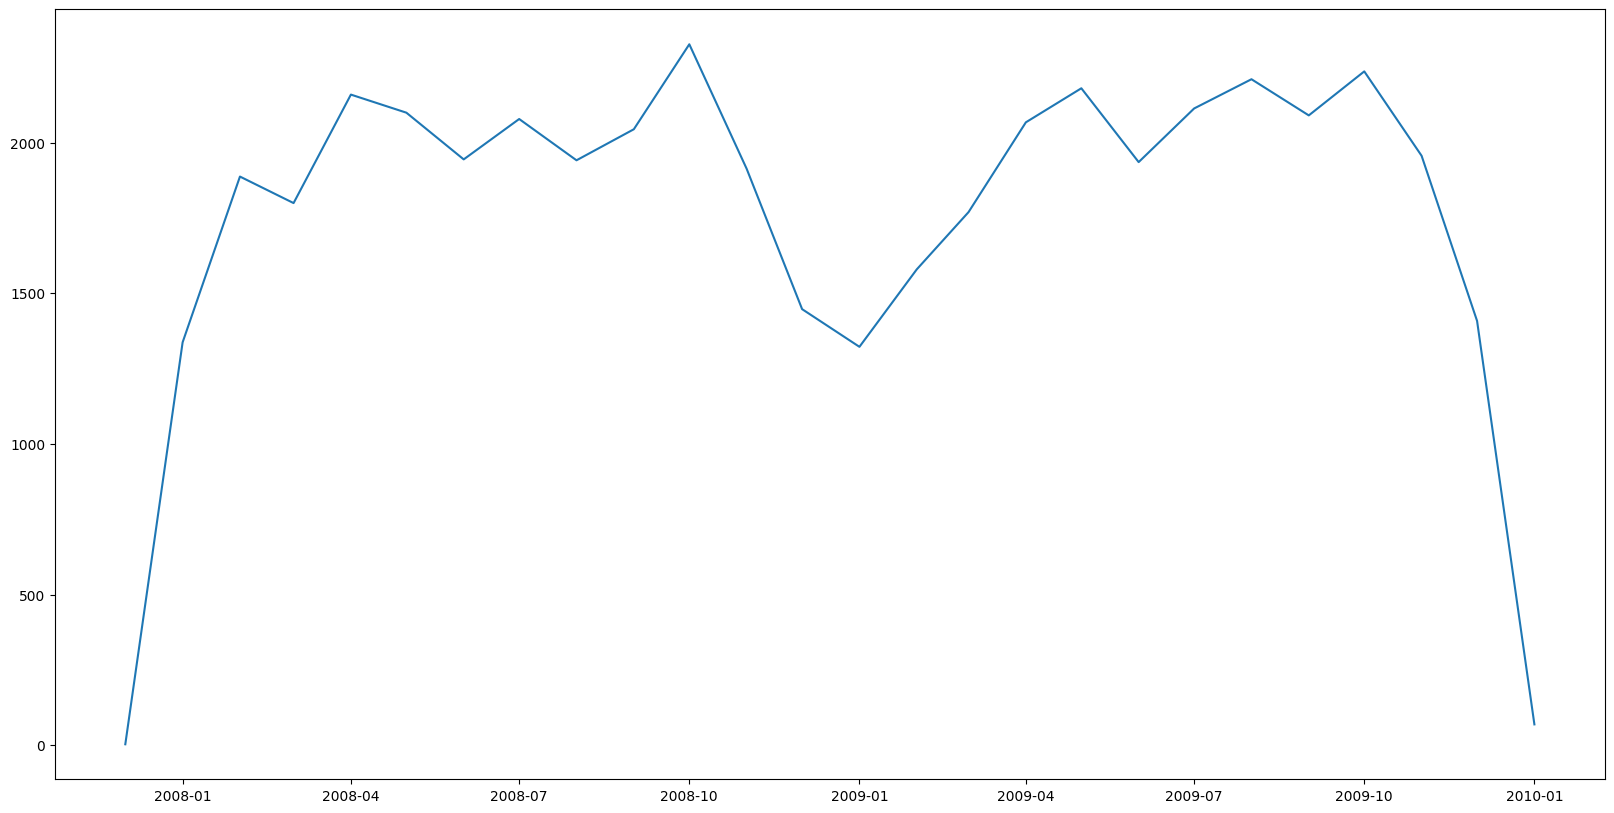

In [40]:

# Group by month and year and sum the number_of_reservations
monthly_df = df2.groupby([df2.index.year, df2.index.month]).sum()

# Rename the MultiIndex to show month and year
monthly_df.index = pd.to_datetime(monthly_df.index.map(lambda x: f"{x[0]}-{x[1]}"))
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
print(monthly_df)
plt.figure(figsize = (20,10))
plt.plot(monthly_df.index,monthly_df)
print(monthly_df.mean())

<Axes: >

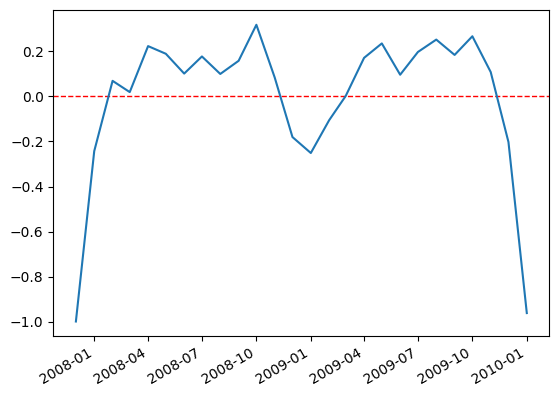

In [49]:
df3 = monthly_df/monthly_df.mean() - 1 
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Plot horizontal line at y = 0
df3.plot()

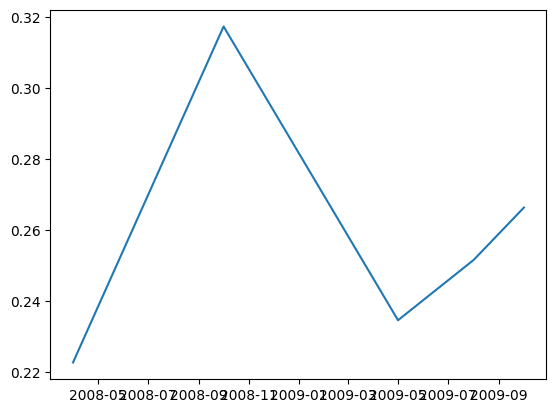

In [48]:
df4 = df3[df3 > 0.2]
plt.plot(df4.index, df4)

date
2007-12-16      3
2007-12-23      0
2007-12-30      0
2008-01-06    122
2008-01-13    293
             ... 
2009-12-20    444
2009-12-27    179
2010-01-03    159
2010-01-10      8
2010-01-17      6
Freq: W-SUN, Name: number_of_reservations, Length: 110, dtype: int64


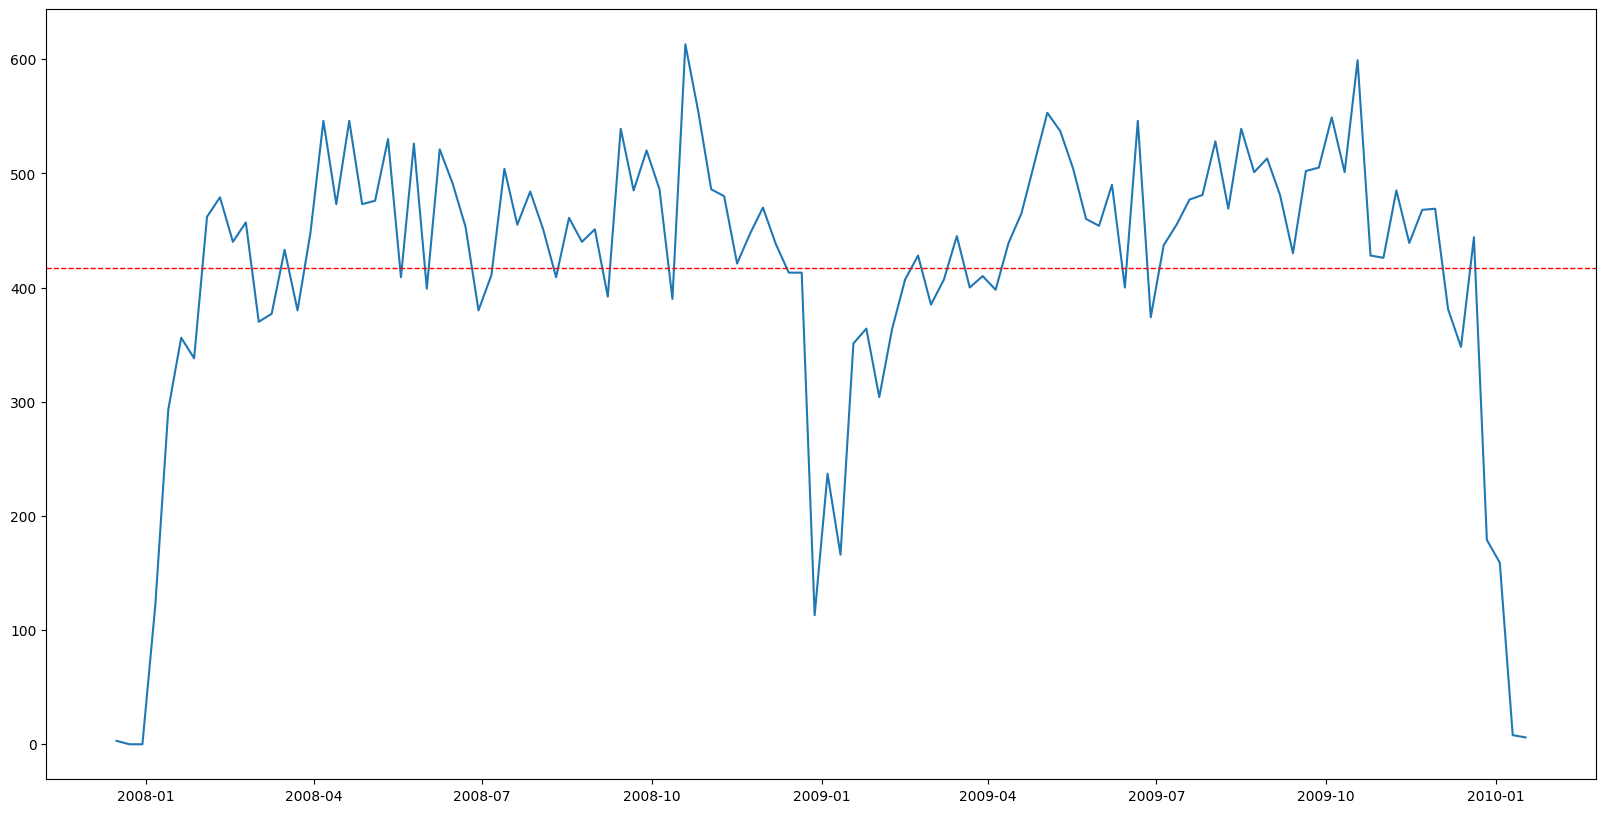

In [56]:
# Group by weeks and sum the number_of_reservations
weekly_df = df2.groupby(pd.Grouper(freq='W')).sum()

# Print the resulting DataFrame
print(weekly_df)
plt.figure(figsize = (20,10))
plt.plot(weekly_df.index, weekly_df)
weekly_mean = weekly_df.mean()
plt.axhline(y=weekly_mean, color='r', linestyle='--', linewidth=1)  # Plot horizontal line at y = 0


<Axes: xlabel='date'>

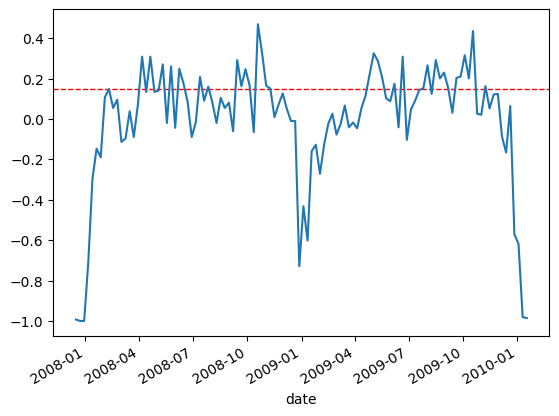

In [58]:
df5 = weekly_df / weekly_mean - 1 
plt.axhline(y=0.15, color='r', linestyle='--', linewidth=1)  # Plot horizontal line at y = 0
df5.plot()